# Data Wrangling Project

The following project aim at assessing data from different sources and organize and clean them to allow their utilization. 

We will use data from tweet archive of the Twitter user WeRateDogs (@dog_rates). It rates picture of users' dog with a funny comment. Ratings have a denominator of 10 and are almost always above 10 (15/10). 

The  data set might present many area needing wrangling effort, however, for this project we will concentrate on the identification and resolution of:
8 quality issues
2 tidiness issues

In [78]:
#Importation of required packages
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
import json
from pprint import pprint
import numpy as np
import tweepy

## 1.Data Collection 

### 1.1 Twitter archive enhanced

In [79]:
df_twitter_arc_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_arc_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [80]:
df_twitter_arc_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 1.2 Image Prediction

For this one we will have to retrieve the data from Udacity's servers using the requests library

In [81]:
#Performing above operation
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


In [82]:
#Reading the image-prediction file
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 1.3 Twitter API 

///////

**#NO TWITTER ACCOUNT WAS CREATED - This code is informative and that is why it is in a Markdown cell**


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_arc_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


///////

In [84]:
#Creating the data frame
tweets_data = []
with open('tweet-json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api_twitter = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

df_api_twitter.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [85]:
#We will select the mandatory column to analyse for this project
df_api = df_api_twitter[['id', 'favorite_count','retweet_count']]

In [86]:
#Checking past operation
df_api.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## 2. Identification of issues 

### 2.1 Twitter archived enhanced

In [87]:
df_twitter_arc_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [88]:
df_twitter_arc_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [89]:
df_twitter_arc_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [90]:
df_twitter_arc_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [91]:
#Identification of wrongly extracted ratings - It was brought to our attention that numerator with decimals had issues
df_twitter_arc_enhanced[df_twitter_arc_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [92]:
print(df_twitter_arc_enhanced['text'][45])
print(df_twitter_arc_enhanced['text'][340])
print(df_twitter_arc_enhanced['text'][695])
print(df_twitter_arc_enhanced['text'][763])
print(df_twitter_arc_enhanced['text'][1689])
print(df_twitter_arc_enhanced['text'][1712])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


Tidiness: 
- The different stages of dogs are spread accross multiple columns. One column only would be sufficient. 


Quality:

- Some missing values appears as "NaN" while others appears as "None" 
- The timestamp are not in datetime
- Retweet are currently included but these are excluded by the project guildelines.
- in_reply_to columns should be integers
- Some dog names are missing or have incorrect values in lower cases
- Some ratings were wrongly extracted

### 2.2 Image Prediction

In [93]:
df_image_prediction.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [94]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [96]:
df_image_prediction.jpg_url.duplicated().sum()

66

Quality: 

- when all p_ columns are False the row should be removed 
- duplicated url should be deleted

### 2.3 Twitter API

In [97]:
df_api.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [98]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Quality: 

- Retweet are not to be included in this analysis


## Summary of issues to adress

#### Tidiness 
- The different stages of dogs are spread accross multiple columns. One column only would be sufficient
- All sets should be merged into one

#### Quality
- Some missing values appears as "NaN" while others appears as "None" 
- The timestamp are not in datetime
- Retweet are currently included but these are excluded by the project guildelines.
- In reply_to columns should be converted
- Some dog names are missing or have incorrect values in lower cases
- when all p_ columns are False the row should be removed 
- duplicated url should be deleted
- Retweet are not to be included in this analysis (api)
- Some ratings were wrongly extracted

## 3. Data Cleaning

##### We will duplicates data set to work with new version to undertake the cleaning process while keeping the originals intact

In [99]:
df_twitter_arc_enhanced_wr = df_twitter_arc_enhanced.copy()
df_image_prediction_wr = df_image_prediction.copy()
df_api_wr = df_api.copy()

In [100]:
#Verifying sets
df_twitter_arc_enhanced_wr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [101]:
df_image_prediction_wr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [102]:
df_api_wr.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### 3.1 First tidiness issue, the spread of dog races accross multiple columns within df_twitter_arc_enhanced_wr

In [103]:
#Merging stages information into one column
df_twitter_arc_enhanced_wr['stage'] = df_twitter_arc_enhanced_wr['text'].str.extract('(doggo|pupper|puppo|floofer)', expand = True)

In [104]:
#Verifying manipulation
df_twitter_arc_enhanced_wr.head(45)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


In [105]:
#Dropping the previous columns
dog_stages = ['doggo', 'pupper', 'puppo', 'floofer']
df_twitter_arc_enhanced_wr = df_twitter_arc_enhanced_wr.drop(dog_stages, axis=1)

In [106]:
#Verifying manipulation
df_twitter_arc_enhanced_wr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### 3.2 Let's now convert the timestamp into the datetime format

In [107]:
#Converting timestamp column
df_twitter_arc_enhanced_wr['timestamp']= pd.to_datetime(df_twitter_arc_enhanced_wr['timestamp']) 

In [108]:
#Checking result
df_twitter_arc_enhanced_wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         399 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 257.8+ KB


#### 3.3 Excluding retweets from df_twitter_arc_enhanced_wr 

In [109]:
#Filtering out the dataset to exclude non null values from the retweeted value
df_twitter_arc_enhanced_wr = df_twitter_arc_enhanced_wr[pd.isnull(df_twitter_arc_enhanced_wr['retweeted_status_id'])]

In [110]:
#Verifying manipulation
df_twitter_arc_enhanced_wr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [111]:
# Dropping the retweeted columns
df_twitter_arc_enhanced_wr = df_twitter_arc_enhanced_wr.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [112]:
#Verifying drop of duplicated related columns
df_twitter_arc_enhanced_wr.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

#### 3.4 Convert data types in_reply

In [113]:
#We first need to fill NaN values to be able to convert 
df_twitter_arc_enhanced_wr.in_reply_to_status_id = df_twitter_arc_enhanced_wr.in_reply_to_status_id.fillna(0)
df_twitter_arc_enhanced_wr.in_reply_to_user_id = df_twitter_arc_enhanced_wr.in_reply_to_user_id.fillna(0)


#Convert data types of both columns
df_twitter_arc_enhanced_wr.in_reply_to_status_id = df_twitter_arc_enhanced_wr.in_reply_to_status_id.astype(np.int64)
df_twitter_arc_enhanced_wr.in_reply_to_user_id = df_twitter_arc_enhanced_wr.in_reply_to_user_id.astype(np.int64)

In [114]:
#Verifying manipulation
df_twitter_arc_enhanced_wr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    364 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 203.9+ KB


#### 3.5 Replacing wrong dog names

In [115]:
#Gathering the lacking names
worl_names = df_twitter_arc_enhanced_wr.loc[(df_twitter_arc_enhanced_wr['name'].str.islower())]

In [116]:
#Save affected as list
worl_names_list = worl_names['text'].tolist()

In [117]:
#Replace affected values by a NaN
for entry in worl_names_list:
    mask = df_twitter_arc_enhanced_wr.text == entry
    name_column = 'name'
    df_twitter_arc_enhanced_wr.loc[mask, name_column] = "None"

In [118]:
#Verifying manipulation - if any lower case name remains
df_twitter_arc_enhanced_wr.loc[(df_twitter_arc_enhanced_wr['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


#### 3.6 Converting the wrong record for missing value in dog names

In [119]:
#We will change None for NaN
df_twitter_arc_enhanced_wr['name'] = df_twitter_arc_enhanced_wr['name'].replace(to_replace='None', value=np.nan, inplace=True)


#### 3.7 Remove raw when all p_values are False

In [120]:
#Identification and grouping of raws which False predictions
Wrongps = df_image_prediction_wr[(df_image_prediction_wr['p1_dog'] == False) & (df_image_prediction_wr['p2_dog'] == False) & (df_image_prediction_wr['p3_dog'] == False)]['tweet_id'].index

In [121]:
#Drop this raw out
df_image_prediction_wr.drop(Wrongps, inplace = True)

In [122]:
#Verify manipulation
assert len(df_image_prediction_wr[(df_image_prediction_wr["p1_dog"] == False) & (df_image_prediction_wr["p2_dog"] == False) & (df_image_prediction_wr["p3_dog"] == False)]) == 0
print("True")

True


#### 3.8 Delete duplicated URL

In [123]:
#Keep is 'first' by default
df_image_prediction_wr = df_image_prediction.drop_duplicates(subset=['jpg_url'])

In [124]:
#Verifying manipulation
df_image_prediction_wr.jpg_url.duplicated().sum()

0

#### 3.9 Exclude retweet from the API set

In [125]:
#Dropping retweets
df_api_wr = df_api_wr.drop(['retweet_count'], axis = 1)

In [126]:
#Verifying manipulation
df_api_wr.head()

,id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


#### 3.10 Correct numerators

In [127]:
#Conversion of numerators to float
df_twitter_arc_enhanced_wr['rating_numerator'] = df_twitter_arc_enhanced_wr['rating_numerator'].astype(float)

In [128]:
#Verifying manipulation
df_twitter_arc_enhanced_wr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     0 non-null object
stage                    364 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 203.9+ KB


In [129]:
#Identification of values to correct
df_twitter_arc_enhanced[df_twitter_arc_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [130]:
#Identification of the correct values to apply 
print(df_twitter_arc_enhanced['text'][45])
print(df_twitter_arc_enhanced['text'][340])
print(df_twitter_arc_enhanced['text'][695])
print(df_twitter_arc_enhanced['text'][763])
print(df_twitter_arc_enhanced['text'][1689])
print(df_twitter_arc_enhanced['text'][1712])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [131]:
#Identification of tweet ID affected
print(df_twitter_arc_enhanced['tweet_id'][45])
print(df_twitter_arc_enhanced['tweet_id'][340])
print(df_twitter_arc_enhanced['tweet_id'][695])
print(df_twitter_arc_enhanced['tweet_id'][763])
print(df_twitter_arc_enhanced['tweet_id'][1689])
print(df_twitter_arc_enhanced['tweet_id'][1712])

883482846933004288
832215909146226688
786709082849828864
778027034220126208
681340665377193984
680494726643068929


In [132]:
#Correction of wrongly extracted numerators

df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75
df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_twitter_arc_enhanced.loc[(df_twitter_arc_enhanced.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [133]:
#Verifying above manipulation

print(df_twitter_arc_enhanced['rating_numerator'][45])
print(df_twitter_arc_enhanced['rating_numerator'][340])
print(df_twitter_arc_enhanced['rating_numerator'][695])
print(df_twitter_arc_enhanced['rating_numerator'][763])
print(df_twitter_arc_enhanced['rating_numerator'][1689])
print(df_twitter_arc_enhanced['rating_numerator'][1712])

13.5
9.75
9.75
11.27
9.5
11.26


#### 3.11 Convert id to tweet_id to merge datasets

In [134]:
df_api_wr.rename(columns={'id': 'tweet_id'}, inplace=True)

#### 3.12 Merging sets into a main one

In [135]:
#Let's first merge df_twitter_arc_enhanced_wr & df_image_prediction_wr and then df_api_wr
#df_twitter_arc_enhanced_wr & df_image_prediction_wr into df_merged1

df_merged1 = pd.merge(df_twitter_arc_enhanced_wr, df_image_prediction_wr, how='left', on=['tweet_id'])

In [136]:
#Verifying manipulation
df_merged1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [137]:
#Now we will merge df_api_wr with our new set into a final one

df_merged_final = pd.merge(df_merged1, df_api_wr, how='left', on=['tweet_id'])

In [138]:
#Verifying above manipulation
df_merged_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count'],
      dtype='object')

## 4. Storing file

In [139]:
df_merged_final.to_csv('twitter_archive_master.csv')

## 4. Analysis

#### 4.1 Devices

We will investigate which kind of hardware is mostly use by @dog_rates

In [140]:
df_merged_final['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

On a total of 2175 tweets, 2042, or more than 93% were made from an iphone. 

#### 4.2 Numerator distribution

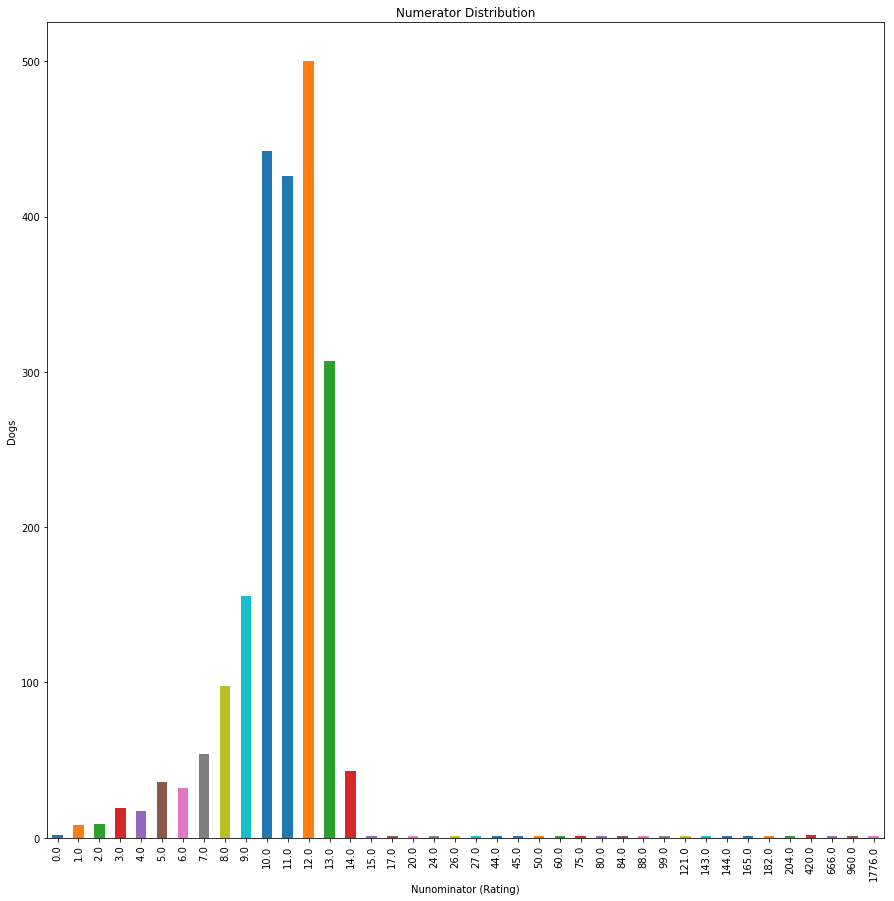

In [141]:
numd = df_merged_final.rating_numerator.value_counts().sort_index().plot('bar', title = 'Numerator Distribution', figsize=(15,15))
numd.set_xlabel("Nunominator (Rating)")
numd.set_ylabel("Dogs")
numd.set_yticks([0, 100, 200, 300, 400, 500])

We can observe that most of the dogs received a Rating of 12, followed by 10 and 11. Interesting to observe when the majortiy of ratings are done on a denominator on 10. But let's confirm that. 

#### 4.3 Denominator distribution

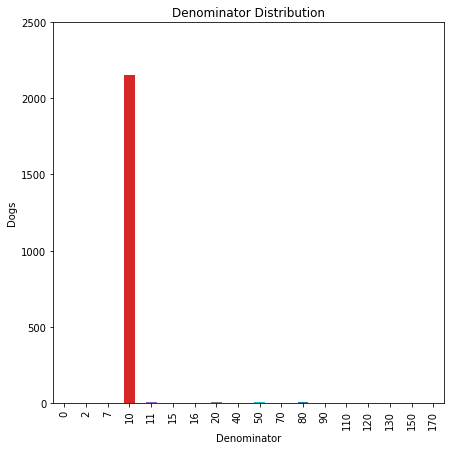

In [142]:
numd = df_merged_final.rating_denominator.value_counts().sort_index().plot('bar', title = 'Denominator Distribution', figsize=(7,7))
numd.set_xlabel("Denominator")
numd.set_ylabel("Dogs")
numd.set_yticks([0, 500, 1000, 1500, 2000, 2500])

More than 2000 thousands of the Dogs were rated on a denominator of 10 which confirmed our what we mentioned earlier. 

#### 4.4 Dog Breed

In [143]:
#Saving the dog breed recognized in p1 with 40 or more matches
dbreed = df_merged_final.groupby('p1').filter(lambda x: len(x) >= 40)

Text(0,0.5,'Match')

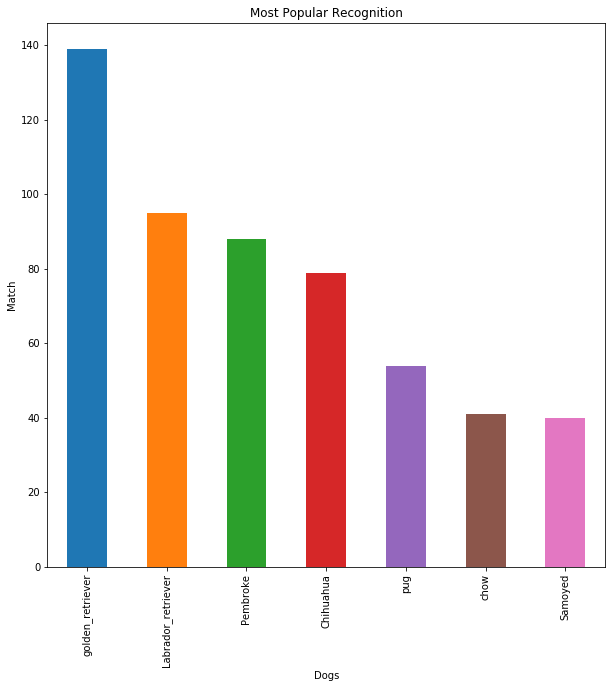

In [147]:
#Visualizing results
dbreed['p1'].value_counts().plot(kind='bar', title='Most Popular Recognition', figsize=(10,10))
plt.xlabel("Dogs")
plt.ylabel("Match")

There are 7 dog breeds which got at least 40 matches. The most common type of breed recognized by the software was Golden Retriever with more than 40 matches of difference with the second one (Labrador retriever). 

#### 4.5 Dogs stages

Text(0,0.5,'Stage')

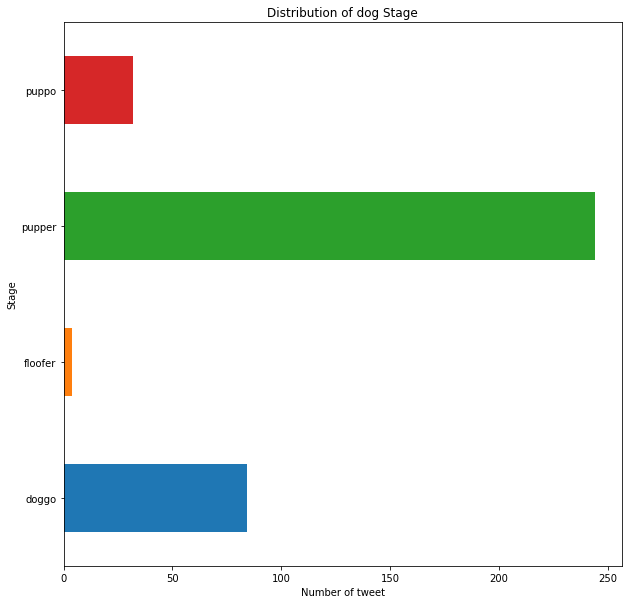

In [149]:
#Visualization of dog stages repartition
ds = df_merged_final.stage.value_counts().sort_index().plot('barh', title = 'Distribution of dog Stage', figsize=(10,10))
ds.set_xlabel("Number of tweet")
ds.set_ylabel("Stage")

Within We_Rate_Dogs activity, the pupper category got the most tweet by far. Pupper regards the youngest category which might explain the attention the category received. 